# Compare BUSCO and fDOG-Assembly results

In [2]:
!pip install matplotlib_venn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 979.2 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 21.4 MB/s eta 0:00:00:00:0100:01


In [3]:
import pickle as pkl
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [4]:
#read in mapping tables
busco_augustus_df = pd.read_csv('../overlap_tables/busco_augustus_overlap_gff_files.tsv', delimiter='\t')
busco_metaeuk_df = pd.read_csv('../overlap_tables/busco_metaeuk_overlap_gff_files.tsv', delimiter='\t')
fa_augustus_df = pd.read_csv('../overlap_tables/fdog_ass_busco_augustus_overlap_gff_files.tsv', delimiter='\t')
fa_metaeuk_df = pd.read_csv('../overlap_tables/fdog_ass_busco_metaeuk_overlap_gff_files.tsv', delimiter='\t')

In [5]:
def open_pkl(path):
    pkl_file = open(path, 'rb')
    dictionary = pkl.load(pkl_file)
    pkl_file.close()
    return dictionary


In [7]:
#read in mapping busco_uniprot
busco_vs_uniprot = open_pkl('../pkl_files/busco_group_vs_uniprot_ident_90_length_70.pkl')

In [8]:
nemve_entries_busco = busco_augustus_df[busco_augustus_df['Species'] == 45351]
gene_set_busco = set(nemve_entries_busco['GeneID'])

nemve_entries_fa = fa_augustus_df[fa_augustus_df['Species'] == 45351]
gene_set_fa = set(nemve_entries_fa['GeneID'])

In [9]:
diff_busco = gene_set_busco - gene_set_fa
print(len(diff_busco))
#print(diff_busco)

diff_fa = gene_set_fa - gene_set_busco
print(len(diff_fa))

intersection = gene_set_busco.intersection(gene_set_fa)
print(len(intersection))

120
16
767


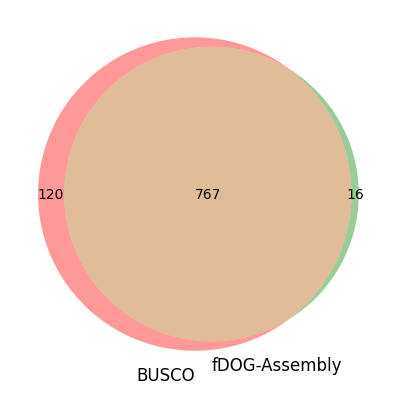

In [10]:
venn2(subsets = (len(diff_busco), len(diff_fa), len(intersection)), set_labels = ('BUSCO', 'fDOG-Assembly'))
plt.show()

# Example 455941at33208 species Nemve

Is included in the BUSCO core group: 45351_0:003f71

In fDOG-Assembly canditate regions were found, genes were predicten but no gene was in the end accepted because in the backward search another HUMAN gene was teh best hit and the distance criterion eliminated it in the end.

Inparanoid found the following gene as ortholog: A7S3U3

BUSCO identified the same gene as an ortholog. 







In [11]:
#print(busco_vs_uniprot)
print(busco_vs_uniprot['455941at33208'])
# KeyError, is not included in the 

O14662


In [12]:
# seems to be the augustus gene prediciton model organism, because when I use fly I was able to find the genes

## Comparsion BUSCO vs fDOG-Assembly

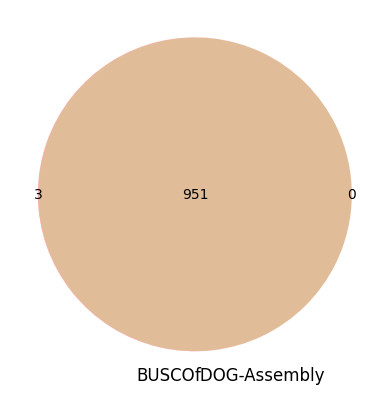

In [13]:
gene_set_busco = set(busco_augustus_df['GeneID'])
gene_set_fa = set(fa_augustus_df['GeneID'])
diff_busco = gene_set_busco - gene_set_fa
diff_fa = gene_set_fa - gene_set_busco

intersection = gene_set_busco.intersection(gene_set_fa)

venn2(subsets = (len(diff_busco), len(diff_fa), len(intersection)), set_labels = ('BUSCO', 'fDOG-Assembly'))
plt.show()

In [14]:
print(diff_busco)

{'643883at33208', '366124at33208', '486993at33208'}


In [15]:
# read in QfO input tables
#read in mapping tables
import pandas as pd
busco_augustus_df = pd.read_csv('../qfo_input/busco_metazoa_augustus.tsv', delimiter='\t', header=None)
busco_metaeuk_df = pd.read_csv('../qfo_input/busco_metazoa_metaeuk.tsv', delimiter='\t', header=None)
fa_augustus_df = pd.read_csv('../qfo_input/fdog_assembly_metazoa_augustus.tsv', delimiter='\t', header=None)
fa_metaeuk_df = pd.read_csv('../qfo_input/fdog_assembly_metazoa_metaeuk.tsv', delimiter='\t', header=None)
print(busco_augustus_df.head())

        0       1
0  P49754  Q19954
1  Q9NRW7  H2KYN0
2  Q16878  Q20893
3  Q8NE00  Q17598
4  Q96CW1  P35603


In [16]:
# Join values of the two columns with an underscore and convert to a set
busco_augustus_set = set(busco_augustus_df.apply(lambda row: '_'.join([str(row[0]), str(row[1])]), axis=1))
busco_metaeuk_set = set(busco_metaeuk_df.apply(lambda row: '_'.join([str(row[0]), str(row[1])]), axis=1))
fa_augustus_set = set(fa_augustus_df.apply(lambda row: '_'.join([str(row[0]), str(row[1])]), axis=1))
fa_metaeuk_set = set(fa_metaeuk_df.apply(lambda row: '_'.join([str(row[0]), str(row[1])]), axis=1))

In [19]:
!pip install venny4py

In [20]:
from venny4py.venny4py import *

sets = {
    'BUSCO Augustus': busco_augustus_set,
    'BUSCO MetaEuk': busco_metaeuk_set,
    'fDOG-Assembly Augustus': fa_augustus_set,
    'fDOG-Assembly MetaEuk': fa_metaeuk_set
}

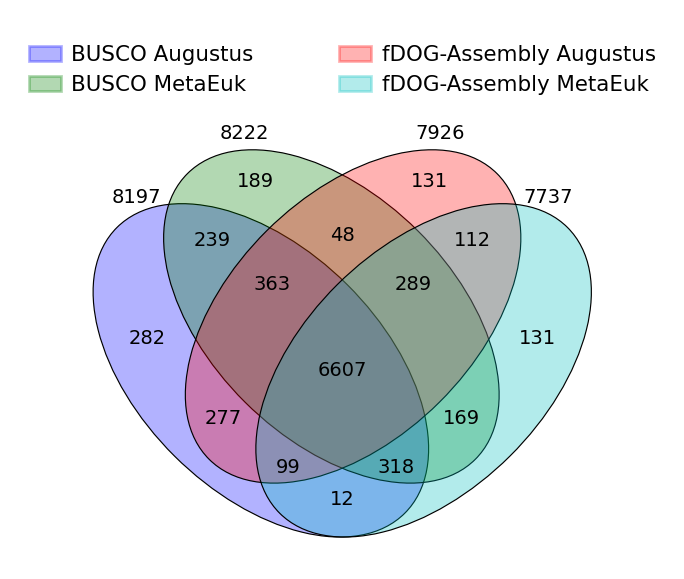

In [21]:
venny4py(sets=sets, dpi=900)

In [22]:
inparanoid_df = pd.read_csv('../qfo_input/inparanoid.tsv', delimiter='\t')
inparanoid_set = set(inparanoid_df.apply(lambda row: '_'.join([str(row[0]), str(row[1])]), axis=1))
length_inparanoid = len(inparanoid_set)
inparanoid_set.update(set(inparanoid_df.apply(lambda row: '_'.join([str(row[1]), str(row[0])]), axis=1)))

/tmp/ipykernel_1278092/3251595541.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inparanoid_set = set(inparanoid_df.apply(lambda row: '_'.join([str(row[0]), str(row[1])]), axis=1))
/tmp/ipykernel_1278092/3251595541.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inparanoid_set.update(set(inparanoid_df.apply(lambda row: '_'.join([str(row[1]), str(row[0])]), axis=1)))


In [23]:
print(len(fa_augustus_set.intersection(inparanoid_set)))
print(len(fa_augustus_set))
print(length_inparanoid)

7372
7926
8486


In [24]:
print(len(fa_metaeuk_set.intersection(inparanoid_set)))
print(len(fa_metaeuk_set))
print(length_inparanoid)

7136
7737
8486


In [25]:
print(len(busco_augustus_set.intersection(inparanoid_set)))
print(len(busco_augustus_set))
print(length_inparanoid)

7417
8197
8486


In [26]:
print(len(busco_metaeuk_set.intersection(inparanoid_set)))
print(len(busco_metaeuk_set))
print(length_inparanoid)

7524
8222
8486
